In [23]:
import pandas as pd
import os
import parse
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
###FUNCTIONS
def parse_stimuli (stimulus):
    stimulus_parser = parse.compile("{foreground}-{sdB:d}_{background}-{snl:d}")
    parse_result = stimulus_parser.parse(stimulus)
    singlemotif = parse_result.named['foreground']
    background = parse_result.named['background']
    sdB = parse_result.named['sdB']
    snl = parse_result.named['snl']
    SNR = snl - sdB
    return singlemotif, sdB, background, snl, SNR

In [25]:
# ###Read in all probe data###
fulldf = pd.read_csv ('C294.csv')
mask = fulldf['experiment'].str.contains('2ac-probe')
probe = fulldf[mask]

###Confirm there are no cue lights
print(probe.lights.unique())

####Pull out only the important columns
smalldf = probe[['subject','correct','response','stimulus', 'time']]
print (len(smalldf))

###Separate stimulus out into foreground, foreground sound level, background, background sound level, and the SNR###
SNRdict = smalldf
motif = []
background = []
sdB = []
snl = []
SNR = []
day = []

for i in SNRdict['stimulus']:
    info = list(parse_stimuli(i))
    motif.append(info[0])
    sdB.append(info[1])
    background.append(info[2])
    snl.append(info[3])
    SNR.append(info[4])
for i in SNRdict['time']:
    miniday = pd.Timestamp(i.split('T')[0])
    day.append(miniday)
SNRdict['Motif'] = motif
SNRdict['sdB'] = sdB
SNRdict['Background'] = background
SNRdict['snl'] = snl
SNRdict['SNR'] = SNR
SNRdict['day'] = day

####Put in the correct keys
full_plot = SNRdict[(SNRdict.response != 'timeout')].reset_index()
full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==1), 'key'] = 'left'
full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==0), 'key'] = 'right'
full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==1), 'key'] = 'right'
full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==0), 'key'] = 'left'

###Bin the data by 50 trials
grouped_plot = full_plot.groupby(full_plot.index // 50)

####Pull out only the data that has log odd for left above .8
sorted_data = pd.DataFrame()
for i in grouped_plot:
    dfi= pd.DataFrame(i[1])
    clean_dfi = dfi[dfi.SNR == 70]
    l = len(clean_dfi[(clean_dfi.response=='peck_left')&(clean_dfi.key=='left')])/len(clean_dfi[clean_dfi.key=='left'])
    if l >= .8:
        sorted_data=sorted_data.append(dfi,ignore_index=True)
        
#####Check to make sure there are still enough data points (above 20 trials for each motif in a SNR)
snrset= sorted(set(sorted_data['SNR']),reverse=True)
motifset = set(sorted_data['Motif'])
snrlist = []
motiflist = []
count = []
numcorrect = []
for i in motifset:
    motifcolumn= sorted_data[sorted_data.Motif==i]
    for j in snrset:
        motiflist.append(i)
        snrlist.append(j)
        snrcolumn= motifcolumn[motifcolumn.SNR==j]
        trialcount = len(snrcolumn.SNR)
        num = len(snrcolumn[snrcolumn.correct==True])
        count.append(trialcount)
        numcorrect.append(num)
motifanalysis={'Motif':motiflist,'SNR':snrlist,'N':count,'Correct':numcorrect}
motifanalysisdf = pd.DataFrame(motifanalysis)
motifanalysisdf['PercentCorrect'] = motifanalysisdf['Correct']/motifanalysisdf['N']
motifanalysisdf
for i in motifset:
    print (motifanalysisdf[motifanalysisdf.Motif==i])

[nan]
33055


/tmp/ipykernel_1751131/1810533212.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751131/1810533212.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751131/1810533212.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

       Motif  SNR     N  Correct  PercentCorrect
0   0oq8ifcb   70  1484     1364        0.919137
1   0oq8ifcb   35  1358     1199        0.882916
2   0oq8ifcb   30   346      309        0.893064
3   0oq8ifcb   25    74       60        0.810811
4   0oq8ifcb   20    73       42        0.575342
5   0oq8ifcb   15    25       15        0.600000
6   0oq8ifcb   10    52       33        0.634615
7   0oq8ifcb    5    28       13        0.464286
8   0oq8ifcb    0    16        8        0.500000
9   0oq8ifcb   -5     7        3        0.428571
10  0oq8ifcb  -10    21       14        0.666667
       Motif  SNR     N  Correct  PercentCorrect
11  ztqee46x   70  1437     1256        0.874043
12  ztqee46x   35  1354     1157        0.854505
13  ztqee46x   30   316      285        0.901899
14  ztqee46x   25    65       51        0.784615
15  ztqee46x   20    88       56        0.636364
16  ztqee46x   15    21       14        0.666667
17  ztqee46x   10    40       18        0.450000
18  ztqee46x    5   

In [16]:
# ###Read in all probe data###
fulldf = pd.read_csv ('C269.csv')
mask = fulldf['experiment'].str.contains('2ac-probe')
probe = fulldf[mask]
probe

,addr,name,subject,time,rtime,trial,result,correct,response,stimulus,correction,experiment,lights
0,beagle-4,gng,C269,2023-05-15T14:27:28.568669-04:00,307778.0,3098,feed,True,peck_right,igmi8fxa-30_btwmt59w1-100,0,2ac-probe-snr70_35_-10-set1-invertedNo,NaN
1,beagle-4,gng,C269,2023-05-15T14:27:11.556788-04:00,NaN,3097,punish,False,timeout,c95zqjxq-30_btwmt59w1-65,0,2ac-probe-snr70_35_-10-set1-invertedNo,NaN
2,beagle-4,gng,C269,2023-05-15T14:26:50.394981-04:00,200227.0,3096,none,True,peck_left,9ex2k0dy-30_btwmt59w4-65,0,2ac-probe-snr70_35_-10-set1-invertedNo,NaN
3,beagle-4,gng,C269,2023-05-15T14:26:36.024846-04:00,86333.0,3095,none,True,peck_left,jkexyrd5-30_btwmt59w3-100,0,2ac-probe-snr70_35_-10-set1-invertedNo,NaN
4,beagle-4,gng,C269,2023-05-15T14:26:21.862087-04:00,615610.0,3094,none,True,peck_right,c95zqjxq-30_btwmt59w2-100,0,2ac-probe-snr70_35_-10-set1-invertedNo,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20430,beagle-4,gng,C269,2023-02-10T06:26:06.986828-05:00,NaN,5,punish,False,timeout,c95zqjxq-30_btwmt59w1-65,0,2ac-probe-snr70_35-set1-invertedNo,NaN
20431,beagle-4,gng,C269,2023-02-10T06:07:49.562443-05:00,NaN,4,punish,False,timeout,jkexyrd5-30_btwmt59w2-100,0,2ac-probe-snr70_35-set1-invertedNo,NaN
20432,beagle-4,gng,C269,2023-02-10T06:07:10.093207-05:00,NaN,3,punish,False,timeout,c95zqjxq-30_btwmt59w5-100,0,2ac-probe-snr70_35-set1-invertedNo,NaN
20433,beagle-4,gng,C269,2023-02-10T06:06:27.242303-05:00,NaN,2,punish,False,timeout,9ex2k0dy-30_btwmt59w1-100,0,2ac-probe-snr70_35-set1-invertedNo,NaN


In [17]:
probe.lights.unique()

array([nan], dtype=object)

In [18]:
smalldf = probe[['subject','correct','response','stimulus', 'time']]
print (len(smalldf))
print(smalldf['stimulus'])

18126
0        igmi8fxa-30_btwmt59w1-100
1         c95zqjxq-30_btwmt59w1-65
2         9ex2k0dy-30_btwmt59w4-65
3        jkexyrd5-30_btwmt59w3-100
4        c95zqjxq-30_btwmt59w2-100
                   ...            
20430     c95zqjxq-30_btwmt59w1-65
20431    jkexyrd5-30_btwmt59w2-100
20432    c95zqjxq-30_btwmt59w5-100
20433    9ex2k0dy-30_btwmt59w1-100
20434    igmi8fxa-30_btwmt59w2-100
Name: stimulus, Length: 18126, dtype: object


In [19]:
###Separate stimulus out into foreground, foreground sound level, background, background sound level, and the SNR###
SNRdict = smalldf
motif = []
background = []
sdB = []
snl = []
SNR = []
day = []

def parse_stimuli (stimulus):
    stimulus_parser = parse.compile("{foreground}-{sdB:d}_{background}-{snl:d}")
    parse_result = stimulus_parser.parse(stimulus)
    singlemotif = parse_result.named['foreground']
    background = parse_result.named['background']
    sdB = parse_result.named['sdB']
    snl = parse_result.named['snl']
    SNR = snl - sdB
    return singlemotif, sdB, background, snl, SNR

for i in SNRdict['stimulus']:
    info = list(parse_stimuli(i))
    motif.append(info[0])
    sdB.append(info[1])
    background.append(info[2])
    snl.append(info[3])
    SNR.append(info[4])
for i in SNRdict['time']:
    miniday = pd.Timestamp(i.split('T')[0])
    day.append(miniday)
SNRdict['Motif'] = motif
SNRdict['sdB'] = sdB
SNRdict['Background'] = background
SNRdict['snl'] = snl
SNRdict['SNR'] = SNR
SNRdict['day'] = day

print(SNRdict)


      subject  correct    response                   stimulus  \
0        C269     True  peck_right  igmi8fxa-30_btwmt59w1-100   
1        C269    False     timeout   c95zqjxq-30_btwmt59w1-65   
2        C269     True   peck_left   9ex2k0dy-30_btwmt59w4-65   
3        C269     True   peck_left  jkexyrd5-30_btwmt59w3-100   
4        C269     True  peck_right  c95zqjxq-30_btwmt59w2-100   
...       ...      ...         ...                        ...   
20430    C269    False     timeout   c95zqjxq-30_btwmt59w1-65   
20431    C269    False     timeout  jkexyrd5-30_btwmt59w2-100   
20432    C269    False     timeout  c95zqjxq-30_btwmt59w5-100   
20433    C269    False     timeout  9ex2k0dy-30_btwmt59w1-100   
20434    C269    False     timeout  igmi8fxa-30_btwmt59w2-100   

                                   time     Motif  sdB Background  snl  SNR  \
0      2023-05-15T14:27:28.568669-04:00  igmi8fxa   30  btwmt59w1  100   70   
1      2023-05-15T14:27:11.556788-04:00  c95zqjxq   30  btwmt

/tmp/ipykernel_1751131/824999547.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751131/824999547.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751131/824999547.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [20]:
full_plot = SNRdict[(SNRdict.response != 'timeout')].reset_index()
full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==1), 'key'] = 'left'
full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==0), 'key'] = 'right'
full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==1), 'key'] = 'right'
full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==0), 'key'] = 'left'
grouped_plot = full_plot.groupby(full_plot.index // 50)
sorted_data = pd.DataFrame()
for i in grouped_plot:
    dfi= pd.DataFrame(i[1])
    clean_dfi = dfi[dfi.SNR == 70]
    l = len(clean_dfi[(clean_dfi.response=='peck_left')&(clean_dfi.key=='left')])/len(clean_dfi[clean_dfi.key=='left'])
    if l >= .8:
        sorted_data=sorted_data.append(dfi,ignore_index=True)

snrset= sorted(set(sorted_data['SNR']),reverse=True)
motifset = set(sorted_data['Motif'])
snrlist = []
motiflist = []
count = []
numcorrect = []
for i in motifset:
    motifcolumn= sorted_data[sorted_data.Motif==i]
    for j in snrset:
        motiflist.append(i)
        snrlist.append(j)
        snrcolumn= motifcolumn[motifcolumn.SNR==j]
        trialcount = len(snrcolumn.SNR)
        num = len(snrcolumn[snrcolumn.correct==True])
        count.append(trialcount)
        numcorrect.append(num)
motifanalysis={'Motif':motiflist,'SNR':snrlist,'N':count,'Correct':numcorrect}
motifanalysisdf = pd.DataFrame(motifanalysis)
motifanalysisdf['PercentCorrect'] = motifanalysisdf['Correct']/motifanalysisdf['N']
motifanalysisdf
for i in motifset:
    print (motifanalysisdf[motifanalysisdf.Motif==i])

/tmp/ipykernel_1751131/250554257.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_data=sorted_data.append(dfi,ignore_index=True)


       Motif  SNR     N  Correct  PercentCorrect
0   igmi8fxa   70  1520     1478        0.972368
1   igmi8fxa   35  1325     1220        0.920755
2   igmi8fxa   30    73       69        0.945205
3   igmi8fxa   25    27       22        0.814815
4   igmi8fxa   20    33       25        0.757576
5   igmi8fxa   15    51       37        0.725490
6   igmi8fxa   10    38       30        0.789474
7   igmi8fxa    5    80       73        0.912500
8   igmi8fxa    0    45       42        0.933333
9   igmi8fxa   -5    82       61        0.743902
10  igmi8fxa  -10   170      144        0.847059
       Motif  SNR     N  Correct  PercentCorrect
11  c95zqjxq   70  1410     1320        0.936170
12  c95zqjxq   35  1333     1187        0.890473
13  c95zqjxq   30    89       78        0.876404
14  c95zqjxq   25    28       25        0.892857
15  c95zqjxq   20    28       25        0.892857
16  c95zqjxq   15    78       53        0.679487
17  c95zqjxq   10    62       48        0.774194
18  c95zqjxq    5   

In [12]:
full_plot = SNRdict[(SNRdict.response != 'timeout')].reset_index()
full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==1), 'key'] = 'left'
full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==0), 'key'] = 'right'
full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==1), 'key'] = 'right'
full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==0), 'key'] = 'left'
grouped_plot = full_plot.groupby(full_plot.index // 50)
sorted_data = pd.DataFrame()
for i in grouped_plot:
    dfi= pd.DataFrame(i[1])
    clean_dfi = dfi[dfi.SNR == 70]
    l = len(clean_dfi[(clean_dfi.response=='peck_left')&(clean_dfi.key=='left')])/len(clean_dfi[clean_dfi.key=='left'])
    if l >= .8:
        sorted_data=sorted_data.append(dfi,ignore_index=True)
print(sorted_data)
###Create Dataframe that contains percent correct across Motif for all trials###
# snrset= sorted(set(sorted_data['SNR']),reverse=True)
# motifset = set(sorted_data['Motif'])
# snrlist = []
# motiflist = []
# count = []
# numcorrect = []
# for i in motifset:
#     motifcolumn= sorted_data[sorted_data.Motif==i]
#     for j in snrset:
#         motiflist.append(i)
#         snrlist.append(j)
#         snrcolumn= motifcolumn[motifcolumn.SNR==j]
#         trialcount = len(snrcolumn.SNR)
#         num = len(snrcolumn[snrcolumn.correct==True])
#         count.append(trialcount)
#         numcorrect.append(num)
# motifanalysis={'Motif':motiflist,'SNR':snrlist,'N':count,'Correct':numcorrect}
# motifanalysisdf = pd.DataFrame(motifanalysis)
# motifanalysisdf['PercentCorrect'] = motifanalysisdf['Correct']/motifanalysisdf['N']
# motifanalysisdf
# for i in motifset:
#     print (motifanalysisdf[motifanalysisdf.Motif==i])

# sorted_data = sorted_data[(sorted_data.SNR == 70)].reset_index()    
# ploting_left_data = sorted_data.groupby(sorted_data.index // 50).apply(
#     lambda x: len(x[(x.response=='peck_left')&(x.key=='left')]) / len(x[x.key=='left']))
# ploting_right_data = sorted_data.groupby(sorted_data.index // 50).apply(
#     lambda x: len(x[(x.response=='peck_left')&(x.key=='right')]) / len(x[x.key=='right']))
# plt.plot(np.asarray(ploting_left_data)[::-1])
# plt.plot(np.asarray(ploting_right_data)[::-1])
# line_plot = np.arange(10,len(ploting_left_data), 10)
# xposition = np.arange(10,len(ploting_left_data), 10)
# #print(xposition)
# for xc in xposition:
#     plt.axvline(x=xc, color='k', linestyle='dashed')

/tmp/ipykernel_1751131/2897643712.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_data=sorted_data.append(dfi,ignore_index=True)


       index subject  correct    response                   stimulus  \
0        222    C291     True  peck_right  0oq8ifcb-30_btwmt59w5-100   
1        223    C291     True   peck_left  vekibwgj-30_btwmt59w1-100   
2        224    C291    False  peck_right   vekibwgj-30_btwmt59w2-65   
3        225    C291     True  peck_right  ztqee46x-30_btwmt59w2-100   
4        230    C291     True  peck_right   0oq8ifcb-30_btwmt59w5-65   
...      ...     ...      ...         ...                        ...   
16598  32279    C291     True   peck_left  l1a3ltpy-30_btwmt59w1-100   
16599  32280    C291     True   peck_left  vekibwgj-30_btwmt59w3-100   
16600  32281    C291     True   peck_left  l1a3ltpy-30_btwmt59w2-100   
16601  32283    C291     True   peck_left   l1a3ltpy-30_btwmt59w5-60   
16602  32414    C291     True   peck_left   vekibwgj-30_btwmt59w4-60   

                                   time     Motif  sdB Background  snl  SNR  \
0      2023-08-30T08:23:12.211440-04:00  0oq8ifcb   30  

In [ ]:
####PRACTICE ON ALL DATA

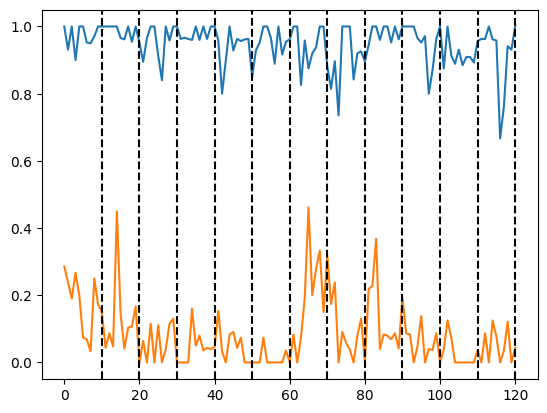

In [6]:
full_plot = SNRdict[(SNRdict.response != 'timeout') & (SNRdict.SNR == 70)].reset_index()
full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==1), 'key'] = 'left'
full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==0), 'key'] = 'right'
full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==1), 'key'] = 'right'
full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==0), 'key'] = 'left'

ploting_left_data = full_plot.groupby(full_plot.index // 50).apply(
    lambda x: len(x[(x.response=='peck_left')&(x.key=='left')]) / len(x[x.key=='left']))
ploting_right_data = full_plot.groupby(full_plot.index // 50).apply(
    lambda x: len(x[(x.response=='peck_left')&(x.key=='right')]) / len(x[x.key=='right']))
plt.plot(np.asarray(ploting_left_data)[::-1])
plt.plot(np.asarray(ploting_right_data)[::-1])
line_plot = np.arange(10,len(ploting_left_data), 10)
xposition = np.arange(10,len(ploting_left_data), 10)
#print(xposition)
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='dashed')

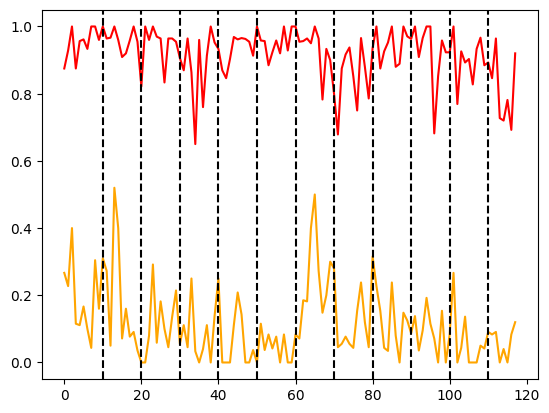

In [7]:
full_plot = SNRdict[(SNRdict.response != 'timeout') & (SNRdict.SNR == 35)].reset_index()
full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==1), 'key'] = 'left'
full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==0), 'key'] = 'right'
full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==1), 'key'] = 'right'
full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==0), 'key'] = 'left'

ploting_left_data = full_plot.groupby(full_plot.index // 50).apply(
    lambda x: len(x[(x.response=='peck_left')&(x.key=='left')]) / len(x[x.key=='left']))
ploting_right_data = full_plot.groupby(full_plot.index // 50).apply(
    lambda x: len(x[(x.response=='peck_left')&(x.key=='right')]) / len(x[x.key=='right']))
plt.plot(np.asarray(ploting_left_data)[::-1], color = 'red')
plt.plot(np.asarray(ploting_right_data)[::-1], color = 'orange')
line_plot = np.arange(10,len(ploting_left_data), 10)
xposition = np.arange(10,len(ploting_left_data), 10)
#print(xposition)
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='dashed')

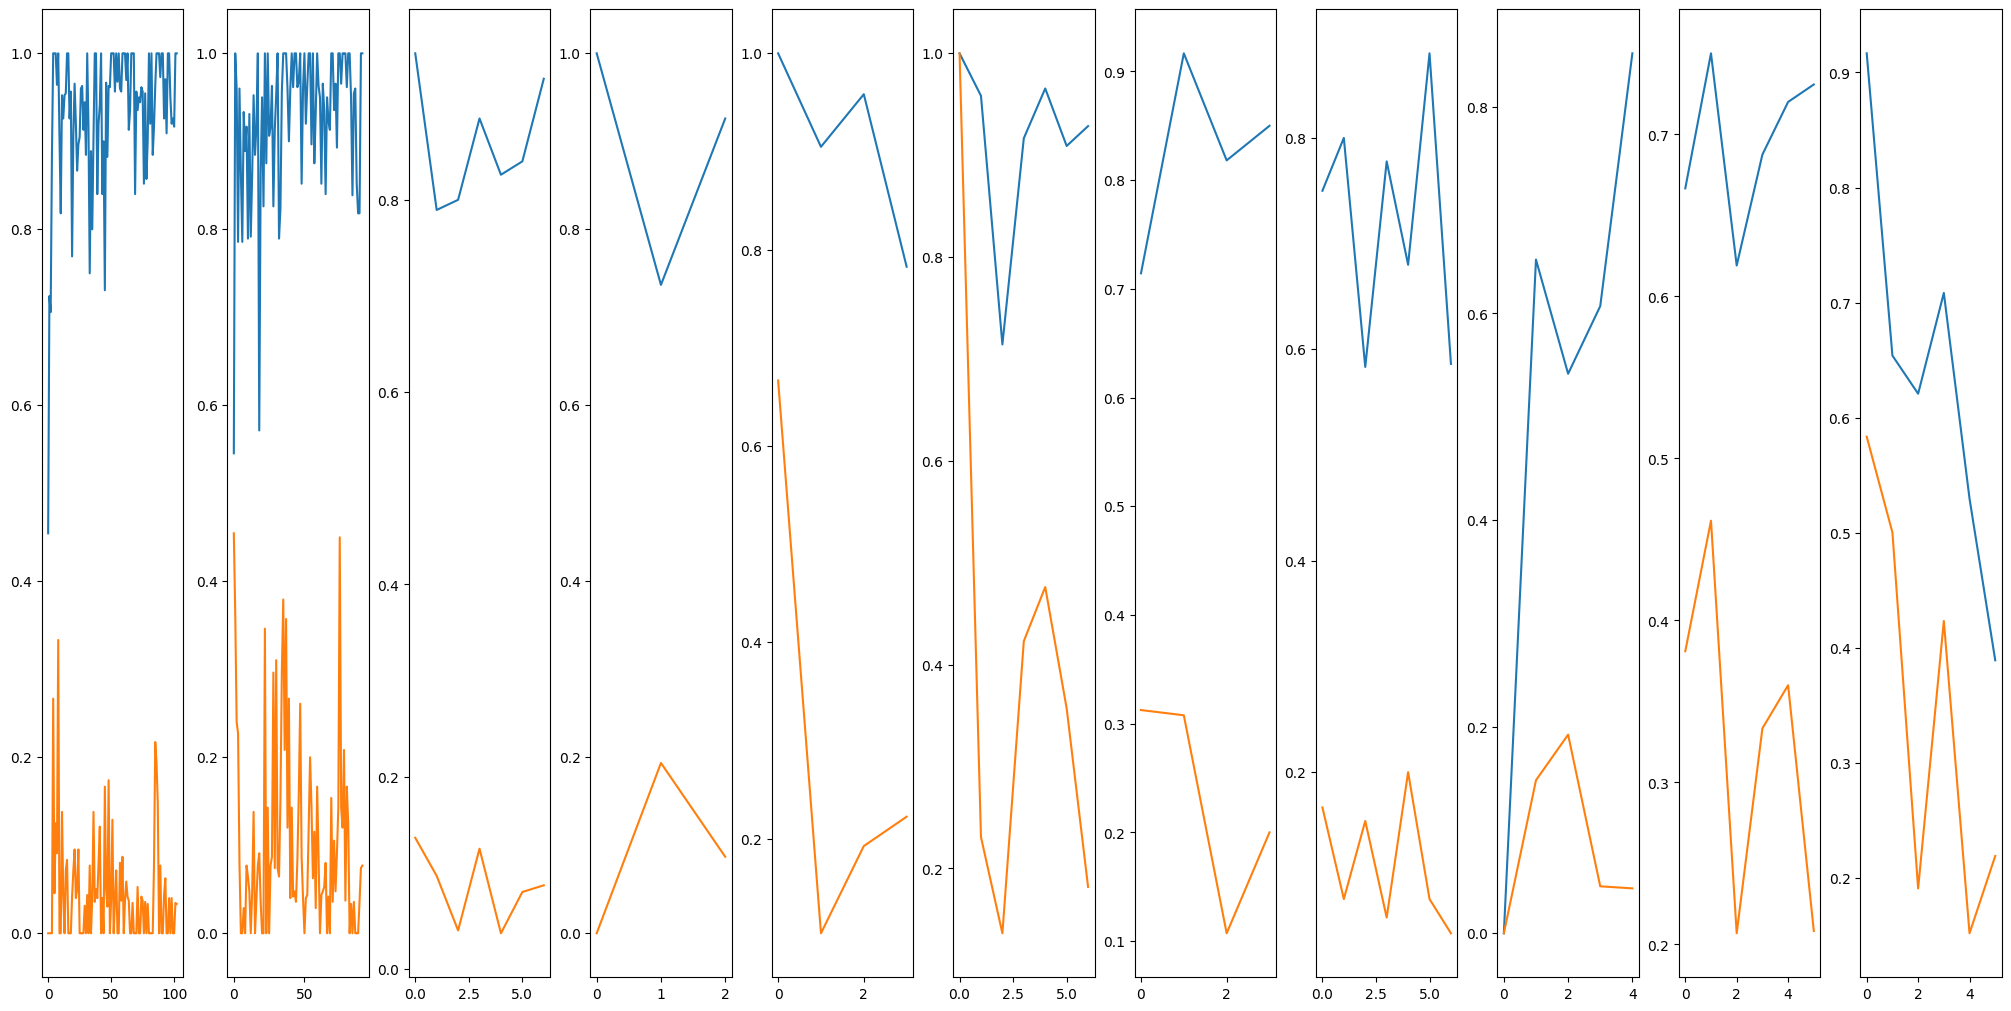

In [194]:
snr_list = sorted(set(SNRdict.SNR), reverse = True)
fig, axs = plt.subplots(1, len(snr_list), layout='constrained', figsize=(20, 10))
for idx, s in enumerate(snr_list):
    full_plot = SNRdict[(SNRdict.response != 'timeout') & (SNRdict.SNR == s)].reset_index()
    full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==1), 'key'] = 'left'
    full_plot.loc[(full_plot.response=='peck_left')&(full_plot.correct==0), 'key'] = 'right'
    full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==1), 'key'] = 'right'
    full_plot.loc[(full_plot.response=='peck_right')&(full_plot.correct==0), 'key'] = 'left'

    ploting_left_data = full_plot.groupby(full_plot.index // 50).apply(
        lambda x: len(x[(x.response=='peck_left')&(x.key=='left')]) / len(x[x.key=='left']))
    ploting_right_data = full_plot.groupby(full_plot.index // 50).apply(
        lambda x: len(x[(x.response=='peck_left')&(x.key=='right')]) / len(x[x.key=='right']))
    axs[idx].plot(np.asarray(ploting_left_data)[::-1])
    axs[idx].plot(np.asarray(ploting_right_data)[::-1])
    line_plot = np.arange(10,len(ploting_left_data), 10)
#     xposition = np.arange(10,len(ploting_left_data), 10)
#     #print(xposition)
#     for xc in xposition:
#         plt.axvline(x=xc, color='k', linestyle='dashed')

102.34

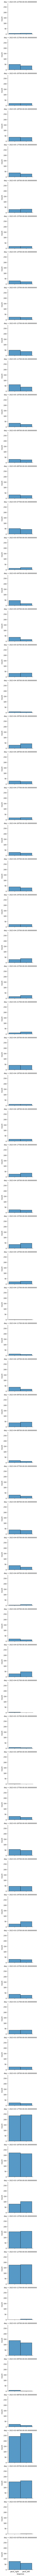

In [204]:
import seaborn as sns
g = sns.FacetGrid(full_plot, row='day')
g.map(sns.histplot, "response")
plt.show()

In [ ]:
###PRACTICE ON A SINGLE DAY

In [30]:
practice_plot = SNRdict[(SNRdict.response != 'timeout') & (SNRdict.SNR == 70) 
                        & (SNRdict.day == '2023-02-10')].reset_index()
practice_plot.loc[(practice_plot.response=='peck_left')&(practice_plot.correct==1), 'key'] = 'left'
practice_plot.loc[(practice_plot.response=='peck_left')&(practice_plot.correct==0), 'key'] = 'right'
practice_plot.loc[(practice_plot.response=='peck_right')&(practice_plot.correct==1), 'key'] = 'right'
practice_plot.loc[(practice_plot.response=='peck_right')&(practice_plot.correct==0), 'key'] = 'left'

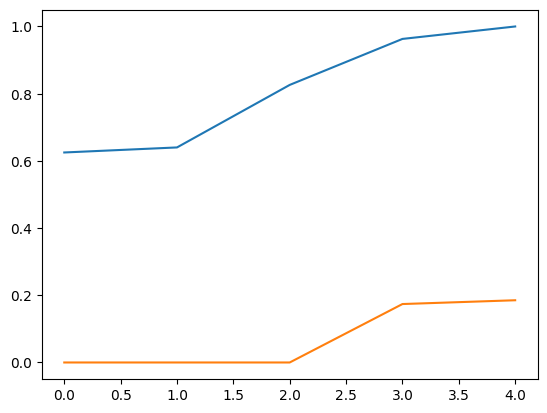

In [41]:
ploting_left_data = practice_plot.groupby(practice_plot.index // 50).apply(
    lambda x: len(x[(x.response=='peck_left')&(x.key=='left')]) / len(x[x.key=='left']))
ploting_right_data = practice_plot.groupby(practice_plot.index // 50).apply(
    lambda x: len(x[(x.response=='peck_left')&(x.key=='right')]) / len(x[x.key=='right']))
plt.plot(np.asarray(ploting_left_data)[::-1])
plt.plot(np.asarray(ploting_right_data)[::-1])


In [ ]:
####PRACTICE ON ALL DATA BY DAY

In [94]:
clean_SNR = SNRdict[(SNRdict.response != 'timeout') & (SNRdict.SNR == 70)]
clean_SNR.loc[(clean_SNR.response=='peck_left')&(clean_SNR.correct==1), 'key'] = 'left'
clean_SNR.loc[(clean_SNR.response=='peck_left')&(clean_SNR.correct==0), 'key'] = 'right'
clean_SNR.loc[(clean_SNR.response=='peck_right')&(clean_SNR.correct==1), 'key'] = 'right'
clean_SNR.loc[(clean_SNR.response=='peck_right')&(clean_SNR.correct==0), 'key'] = 'left'

/tmp/ipykernel_1792863/3566177503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_SNR.loc[(clean_SNR.response=='peck_left')&(clean_SNR.correct==1), 'key'] = 'left'


In [136]:
def percent_left (group):
    if len(group.key) != 0:
        return group.groupby(group.index // 50).apply(
            lambda x: len(x[(x.response=='peck_left')&(x.key=='left')]) / len(x[x.key=='left']))


In [205]:
groups = clean_SNR.groupby(pd.Grouper(key='day', freq='1D'))
to_drop = []
for name, group in groups:
    if len(group) == 0:
        print(name)
#     #ploting_right_data = group.groupby(group.index // 50).apply(
#     #lambda x: len(x[(x.response=='peck_left')&(x.key=='right')]) / len(x[x.key=='right']))
       #
#     #plt.plot(np.asarray(ploting_right_data)[::-1])

2023-02-14 00:00:00
2023-02-15 00:00:00
2023-02-16 00:00:00
2023-02-17 00:00:00
2023-02-18 00:00:00
2023-02-19 00:00:00
2023-02-20 00:00:00
2023-02-21 00:00:00
2023-02-22 00:00:00
2023-02-23 00:00:00
2023-02-24 00:00:00
2023-03-07 00:00:00
2023-03-12 00:00:00
2023-04-13 00:00:00
2023-04-30 00:00:00
2023-05-01 00:00:00


In [17]:
for i in groups:
    Responsedict = SNRdict[SNRdict.response != 'timeout']
print(Responsedict)

NameError: name 'groups' is not defined